#MOVING AVERAGE CROSSOVER STRATEGY:
A moving average crossover strategy is a popular trading strategy that involves the use of two moving averages such as simple or exponential moving averages. In this project, we use two aimple moving averages: Short term moving average(SMA) and Long term moving average(LMA). Buy signal is generated when SMA goes above LMA and sell signal is generated when SMA crosse below LMA.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#Read apple stock data
data= pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750229,132079200


Calculate SMA, LMA and generate signals:

In [64]:
# Step 2: Calculate Moving Averages
symbol='AAPL'
short_window = 20  # Short-term moving average period
long_window = 100  # Long-term moving average period
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
print(data.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059425   
1  2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349144   
2  2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925636   
3  2020-01-07  74.959999  75.224998  74.370003  74.597504  72.582657   
4  2020-01-08  74.290001  76.110001  74.290001  75.797501  73.750229   

      Volume   Short_MA    Long_MA  
0  135480400  75.087502  75.087502  
1  146322800  74.722500  74.722500  
2  118387200  74.798332  74.798332  
3  108872000  74.748125  74.748125  
4  132079200  74.958000  74.958000  


In [65]:
# Step 3: Generate Signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()
#print(data)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20176\574727026.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
C:\Users\ADMIN\A

Backtest the strategy with initial capital of $100000. 

In [66]:
# Step 4: Backtest the Strategy
initial_capital = 100000
data['Cash']=0
data['Cash'].iloc[0]=100000
capital = initial_capital
data['Holdings']=0
#print(data.head())
# Simulate trading
for i in range(1, len(data)):
    if data['Position'].iloc[i] == 1 and data['Position'].iloc[i-1] != 1:  # Buy signal
        shares_to_buy = data['Cash'].iloc[i-1] // data['Close'].iloc[i]
        if shares_to_buy > 0:
            capital = 0
            data['Holdings'].iloc[i] = shares_to_buy
            data['Cash'].iloc[i]=0
        else:
            data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
            data['Cash'].iloc[i]=data['Cash'].iloc[i-1]
            
    elif data['Position'].iloc[i] == -1 and data['Position'].iloc[i-1] != -1:  # Sell signal
        shares_to_sell = data['Holdings'].iloc[i-1]
        if shares_to_sell > 0:
            capital = shares_to_sell * data['Close'].iloc[i]
            data['Holdings'][i] = 0
            data['Cash'].iloc[i]=capital
        else:
            data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
            data['Cash'].iloc[i]=data['Cash'].iloc[i-1]
    else:
        data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
        data['Cash'].iloc[i]=data['Cash'].iloc[i-1]


    # Update portfolio value
data['Portfolio'] = data['Cash'] + data['Holdings'] * data['Close']

print(data.tail())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20176\604132830.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Cash'].iloc[0]=100000
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20176\604132830.py:4: SettingWithCopyWarning: 
A value is

            Date        Open        High         Low       Close   Adj Close  \
1001  2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
1002  2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
1003  2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
1004  2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
1005  2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

        Volume    Short_MA     Long_MA  Signal  Position  Cash  Holdings  \
1001  37122800  193.668500  181.768301       1       0.0   0.0       809   
1002  28919300  193.831501  181.787101       1       0.0   0.0       809   
1003  48087700  193.969001  181.898701       1       0.0   0.0       809   
1004  34049900  194.179501  182.046001       1       0.0   0.0       809   
1005  42628800  194.308501  182.173301       1       0.0   0.0       809   

          Portfolio  
1001  156622.404854  
1002  156177.45242

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20176\604132830.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holdings'].iloc[i] = data['Holdings'].iloc[i-1]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20176\604132830.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform

Plot the portfolio value over time:

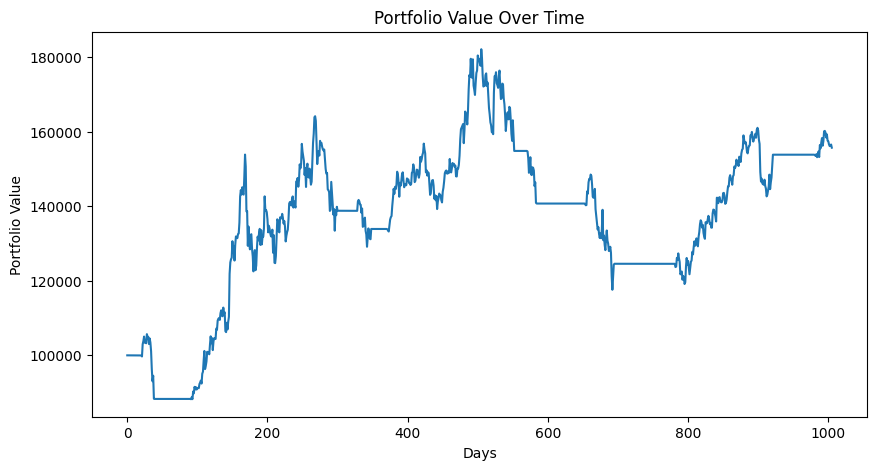

Final Portfolio Value: $155756.77


In [67]:
# Step 5: Analyze Results
# Plot the portfolio value over time
plt.figure(figsize=(10, 5))
plt.plot(data['Portfolio'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

# Print final portfolio value
final_value = data['Portfolio'].iloc[-1]
print(f'Final Portfolio Value: ${final_value:.2f}')


Initial capital: $100000.00

Final Portfolio value: $155756.77

Plot of buy signals, sell signals, SMA and LMA generated over time

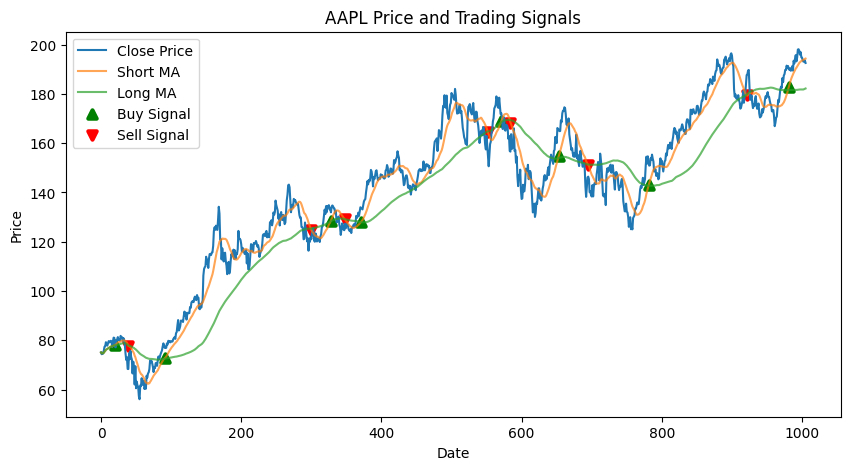

In [68]:
# Plot buy and sell signals
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Short_MA'], label='Short MA', alpha=0.7)
plt.plot(data['Long_MA'], label='Long MA', alpha=0.7)
plt.scatter(data.loc[data['Position'] == 1].index, 
            data['Short_MA'][data['Position'] == 1], 
            marker='^', color='g', lw=3, label='Buy Signal')
plt.scatter(data.loc[data['Position'] == -1].index, 
            data['Short_MA'][data['Position'] == -1], 
            marker='v', color='r', lw=3, label='Sell Signal')
plt.title(f'{symbol} Price and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()